In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
__PATH  = "/home/pixlog/Desktop/EstudoMesh/Matheus_Campo/2022-07-15-14-45/2022-07-15-14-45-Positions-12.csv"
positions = pd.read_csv(__PATH,sep = ';',header=None).to_numpy(np.float64)

In [37]:
class Log:
    def __init__(self,x,y,z,r):
        self._x = [x]
        self._y = [y]
        self._z = [z]
        self._r = [r]
        self.x  = x
        self.y  = y
        self.z  = z
        self.r  = r
        self.q  = 1
        #self.counts = 1

In [38]:
def show_collisions(logs,index):
    for i in range(len(logs)):
        for j in range(len(logs)):
            if index[i,j]<0.2:
                plt.plot([logs[i].x,logs[j].x],[logs[i].y,logs[j].y],c='r')

def create_plot(title = "minimapa"):
    plt.figure(figsize = (12,9))
    plt.grid()
    plt.xlim(-0.4,3)
    plt.ylim(-0.5,2)
    plt.title(title,fontsize=20)


def plot_circle(x,y,r,c='b'):
    x_c = r*np.cos( np.linspace(-np.pi,np.pi))+x
    y_c = r*np.sin( np.linspace(-np.pi,np.pi))+y
    plt.plot(x_c,y_c,c=c)
    

    
def show(logs,c = "b"):
    for log in logs:
        plt.scatter(log.x,log.y,c='black')
        plot_circle(log.x,log.y,log.r,c = c)

In [39]:
logs = []
for x,y,z,r in positions:
    logs.append(Log(x,y,z,r))

In [40]:
def distances(logs):
    N = len(logs)
    dists = np.zeros((N,N))
    index = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            dists[i,j]     = ((logs[i].x-logs[j].x)**2+(logs[i].y-logs[j].y)**2+(logs[i].z-logs[j].z)**2)**0.5
            distance_index = (dists[i,j]/(logs[i].r+logs[j].r))
            index[i,j]     = distance_index if distance_index > 0 else 2
            
            #d1 = (r[0]**2 - r[1]**2 + d**2)/(2*d)
            #d2 = (r[1]**2 - r[0]**2 + d**2)/(2*d)
            #a1 = (r[0]**2)*np.arccos(d1/r[0]) - d1*(r[0]**2-d1**2)**0.5
            #a2 = (r[1]**2)*np.arccos(d2/r[1]) - d2*(r[1]**2-d2**2)**0.5
            
    return index

In [41]:
index = distances(logs)

In [42]:
index[index<0.2]

array([0.18253224, 0.19737972, 0.18253224, 0.04516222, 0.19737972,
       0.04516222, 0.19979048, 0.19979048])

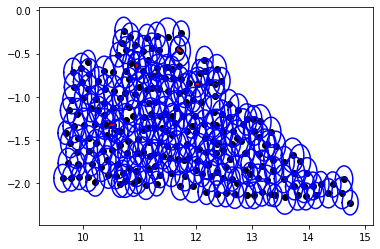

In [43]:
show(logs)
show_collisions(logs,index)

In [44]:
def fuse(i,j,logs,show = True):
    nx = (logs[i].x*logs[i].q+logs[j].x*logs[j].q)/(logs[i].q+logs[j].q)
    ny = (logs[i].y*logs[i].q+logs[j].y*logs[j].q)/(logs[i].q+logs[j].q)
    nz = (logs[i].z*logs[i].q+logs[j].z*logs[j].q)/(logs[i].q+logs[j].q)
    nr = (logs[i].r*logs[i].q+logs[j].r*logs[j].q)/(logs[i].q+logs[j].q)
    nc = 1
    na = 1
    logs.append(Log(nx,ny,nz,nr) ) 
    
    if show:
        plt.scatter(nx,ny,c='r')
        plot_circle(nx,ny,nr,c='r')

def fuse_process(logs,index,threshold = 0.2):
    logs_to_exclude = []
    logs_to_fuse    = []
    for i in range(len(logs)):
        for j in range(len(logs)):
            if i < j:
                if index[i,j]<threshold and index[i,j]<1:
                    logs_to_exclude.append(i)
                    logs_to_exclude.append(j)
                    logs_to_fuse.append((i,j))
    
    for i,j in logs_to_fuse:
        fuse(i,j,logs)
    
    logs_to_exclude = list(set(logs_to_exclude))
    logs_to_exclude.sort()
    
    for i in logs_to_exclude[::-1]:
        logs.pop(i)

    

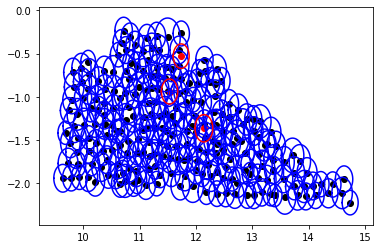

In [46]:
#create_plot()
show(logs)
fuse_process(logs,index,threshold = 0.2)